In [25]:
import pandas as pd
import os
import glob
import concurrent.futures
import time

directory = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 3'
directory2 = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 3'
cate_dir = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'
cate_dir2 = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'

# list of Excel files to read data from
if os.path.exists(os.path.join(directory, '230301 Payment Summary - 2023-03-02T084245.428.xlsx')):
    excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
else:
    excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
try:
    # use cols 0, Barcode; 2, Category Name
    # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
    # use cols 0, Barcode; 3, SubCategory Name
    df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
    pass
except FileNotFoundError:
    # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
    # use cols 0, Barcode; 3, SubCategory Name
    df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
    pass
# create an empty list to store the dataframes
# dfs = [] sho

outputfile =  'dataM3.csv'
# def excel2csv
def excel2csv(inputfile, outputfile):
    
    # Check if exist file_path
    if not os.path.exists(outputfile):
        with open(outputfile, 'w') as f:
            pass

    # Read the first line of the file
    with open(outputfile, 'r') as f:
        first_line = f.readline().strip()
    # Check if the first line contains the expected column names
    has_headers = 'InvoiceID' in first_line
    df = pd.read_excel(inputfile, sheet_name='Sheet2', skiprows=2, usecols=[4,7,8,14])
    # df2 Category
    
    # merge with Category, on "Barcode"
    df = df.merge(df2, on='Barcode', how='left')
    
    # Check if the first line contains the expected column names
    df.to_csv(outputfile, mode='a', header= not has_headers, index=False)


# loop through the list of Excel files
with concurrent.futures.ThreadPoolExecutor() as executor:
    [executor.submit(excel2csv, file, outputfile) for file in excel_files]
    # for file in excel_files:
    #     executor.submit(excel2csv,file)

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample data
dtypes = {'InvoiceID': str, 'Barcode': str, 'Sum of Qty': str, 'Total Exclude VAT': str, 'SubCategory Name': str}
df = pd.read_csv('dataM1.csv', dtype=dtypes)

df['Sum of Qty'] = pd.to_numeric(df['Sum of Qty'], errors='coerce').fillna(0).astype(int)
df['Total Exclude VAT'] = pd.to_numeric(df['Total Exclude VAT'], errors='coerce').fillna(0).astype(float)
df['SubCategory Name'] = df['SubCategory Name'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333854 entries, 0 to 333853
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   InvoiceID          333854 non-null  object 
 1   Barcode            333854 non-null  object 
 2   Sum of Qty         333854 non-null  int32  
 3   Total Exclude VAT  333854 non-null  float64
 4   SubCategory Name   333854 non-null  object 
dtypes: float64(1), int32(1), object(3)
memory usage: 11.5+ MB


In [3]:
# bill0 = df1.groupby('InvoiceID').filter(lambda x: x['Sum of Qty'].sum() == 0)

bill0 = df[df['Sum of Qty'] == 0]

bill0


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
51,VN0001010201230023,260501000011,0,0.0,Hot pot Thai
119,VN0001010201230057,8936127796217,0,0.0,Sugar Tea
120,VN0001010201230057,8936127796019,0,0.0,Sugar Tea
262,VN0001010201230116,2010809000482,0,0.0,Cold Local Drinks
378,VN0001010201230168,8935049510864,0,0.0,Purified water
...,...,...,...,...,...
333454,VN0236010101230192,8934822120214,0,0.0,Import Beer Bottle
333656,VN0236010101230264,2701020000053,0,0.0,Onigiri
333674,VN0236010101230267,8938526588028,0,0.0,Dessert Sub
333725,VN0236010101230287,8934803026078,0,0.0,Salty Snacks


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# filter out rows where 'Sum of Qty' or 'Total Exclude VAT' are zero
df_filtered = df[(df['Sum of Qty'] > 0) & (df['Total Exclude VAT'] > 0)]


# Calculate the IQR and filter out outliers
# Q1 = np.percentile(df_filtered['Total Exclude VAT'], 25)
# Q3 = np.percentile(df_filtered['Total Exclude VAT'], 75)
# IQR = Q3 - Q1
# upper_bound = Q3 + 1.5 * IQR
# lower_bound = 1000
# df_filtered = df_filtered[(df_filtered['Total Exclude VAT'] >= lower_bound) & (df_filtered['Total Exclude VAT'] <= upper_bound)]

new_df = df_filtered.dropna().groupby('InvoiceID').agg({'Barcode': lambda x: ', '.join(x.astype(str)), 
                                      'Sum of Qty': 'sum', 
                                      'Total Exclude VAT': 'sum', 
                                      'SubCategory Name': lambda x: ', '.join(x.astype(str))})

new_df

,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,
VN0001010101230001,8935049500544,1,6481.0,Mineral water
VN0001010101230002,8938512632025,2,11112.0,Purified water
VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",5,106482.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",6,174478.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
VN0001010101230005,"8934588843051, 8934588183133",2,24074.0,"Sports Drinks Sub, Sports Drinks Sub"
...,...,...,...,...
VN0236020201230042,"2090103000203, 8934563193263",3,19091.0,"Hard Candy, Instant Noodles Pack"
VN0236020201230043,"8850393919975, 8934717401305, 8935049501503, 2...",14,310216.0,"Drink, Frozen meals, Sugar CSD, Onigiri, Onigi..."
VN0236020201230044,"2701020000022, 2010904000141, 8938528953008",3,53290.0,"Onigiri, Sandwich, Other biscuits"


In [5]:
import statistics
from scipy import stats
# Calculate the statistical measures using describe() method
stat = new_df.describe()

# Calculate the median and mode of the 'Total Exclude VAT' column
mean = statistics.mean(new_df['Total Exclude VAT'])
median = statistics.median(new_df['Total Exclude VAT'])
mode = new_df['Total Exclude VAT'].mode()[0]
std = statistics.stdev(new_df['Total Exclude VAT'])
min_val = new_df['Total Exclude VAT'].min()
max_val = new_df['Total Exclude VAT'].max()
# Extract the desired values from the summary
mean1 = stat.loc['mean']
std1 = stat.loc['std']
min_val1 = stat.loc['min']
max_val1 = stat.loc['max']

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

# print("Mode of Total Exculde VAT", new_df['Total Exclude VAT'].mode()[0])

Mean: 55431.36955709145
Median: 32727.0
Mode: 10909.0
Standard Deviation: 78693.17171355708
Minimum Value: 1.0
Maximum Value: 8443636.0


In [34]:
# to csv
new_df.to_csv("dataCleanM3.csv")

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Group the data based on Total Exclude VAT and calculate the counts
bins = np.concatenate(([0], np.arange(5000, 300001, 5000), [np.inf]))
labels = ['<5,000'] + ['{} to {}' .format(i, i+4999) for i in range(5000, 300000, 5000)] + ['>=300,000']
df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)

grouped_data = df_filtered.groupby('Basket Value')['Total Exclude VAT'].agg(['count','mean','median'])

C:\Users\trieu.pham\AppData\Local\Temp\ipykernel_20000\303922941.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)


c:\Users\trieu.pham\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


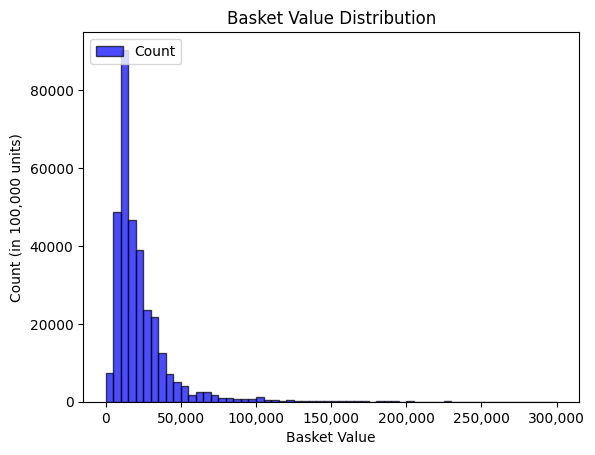

In [5]:
# Add a new column for Count x Mean
grouped_data['Value'] = grouped_data['count'] * grouped_data['mean']

# Update x-axis labels
grouped_data.index = grouped_data.index.astype(str).str.replace(',', '')

# Plot histogram
fig, ax = plt.subplots()

# Plot histogram
n, bins, patches = ax.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='blue', edgecolor='black')
ax.set_xlabel('Basket Value')
ax.set_ylabel('Count (in 100,000 units)')
ax.set_title('Basket Value Distribution')

# Update x-axis labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Show legend
ax.legend(['Count'], loc='upper left')

plt.show()

In [6]:

# Display grouped data with additional column
grouped_data['Count'] = grouped_data['count'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Mean'] = grouped_data['mean'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Median'] = grouped_data['median'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Count x Mean'] = grouped_data['Value'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data = grouped_data[['Count', 'Mean', 'Median', 'Value']]
print(grouped_data)

                   Count     Mean   Median        Value
Basket Value                                           
<5000              7,301    3,190    2,778   23289885.0
5000 to 9999      60,472    7,975    8,182  482235830.0
10000 to 14999    78,583   12,121   11,818  952536350.0
15000 to 19999    52,338   17,646   17,593  923558685.0
20000 to 24999    35,035   22,699   22,727  795260367.0
...                  ...      ...      ...          ...
280000 to 284999      17  282,162  281,818    4796752.0
285000 to 289999      22  287,072  286,364    6315591.0
290000 to 294999      25  291,673  290,909    7291813.0
295000 to 299999      25  297,681  298,180    7442013.0
>=300000             446  482,602  393,182  215240305.0

[61 rows x 4 columns]


In [46]:
# Save grouped data to CSV file
grouped_data.to_csv('groupdataM1.csv')

In [7]:
# Apply string slicing to create new columns 'StorID' and 'BusinessDate'
new_df['StoreID'] = new_df.index.map(lambda x: x[:6])
new_df['BusinessDate'] = new_df.index.map(lambda x: x[8:14])

# Reorder the columns
new_df = new_df.reindex (columns=['StoreID','BusinessDate','Barcode','Sum of Qty','Total Exclude VAT','SubCategory Name'])

# Show the first 5 rows
new_df.head(5)


,StoreID,BusinessDate,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
InvoiceID,,,,,,
VN0001010101230001,VN0001,010123,8935049500544,1,6481.0,Mineral water
VN0001010101230002,VN0001,010123,8938512632025,2,11112.0,Purified water
VN0001010101230003,VN0001,010123,"8936011773416, 8936079121761, 8850453017528, 8...",5,106482.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
VN0001010101230004,VN0001,010123,"8801100128845, 2010101000005, 2010805000295, 8...",6,174478.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
VN0001010101230005,VN0001,010123,"8934588843051, 8934588183133",2,24074.0,"Sports Drinks Sub, Sports Drinks Sub"


In [8]:
# Calculate the ADS for each store
grouped_by_store_net = new_df.groupby('StoreID').agg({'Total Exclude VAT': 'sum', 'Sum of Qty': 'sum', 'BusinessDate': 'nunique'})
grouped_by_store_net['ADS'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['BusinessDate']
grouped_by_store_net

,Total Exclude VAT,Sum of Qty,BusinessDate,ADS
StoreID,,,,
VN0001,37069194.0,2201,2,18534597.0
VN0002,54887716.0,2455,2,27443858.0
VN0003,54329466.0,3001,2,27164733.0
VN0005,52771327.0,3062,2,26385663.5
VN0006,64483605.0,3325,2,32241802.5
...,...,...,...,...
VN0232,17126740.0,1050,2,8563370.0
VN0233,15818640.0,865,2,7909320.0
VN0234,19090178.0,1126,2,9545089.0


In [9]:
# StoreID and BusinessDate added to the filter dataframe
df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])

# Group by Basket Value and StoreID and calculate count and mean
grouped_data_store = df_filtered.groupby(['Basket Value', 'StoreID']).agg({'InvoiceID': 'count', 'Total Exclude VAT': 'mean'})
grouped_data_store.rename(columns={'InvoiceID': 'count', 'Total Exclude VAT': 'mean'}, inplace=True)
grouped_data_store.reset_index(inplace=True)

# Calculate the 'value' column as the product of 'mean' and 'count'
grouped_data_store['Value'] = grouped_data_store['mean'] * grouped_data_store['count']

# Remove rows with count=0
grouped_data_store = grouped_data_store.query('count != 0')

# Remove rows with NaN values in 'Value' column
grouped_data_store.dropna(subset=['Value'], inplace=True)

# Reset index
grouped_data_store.reset_index(drop=True, inplace=True)

# Show the updated DataFrame
print(grouped_data_store)

C:\Users\trieu.pham\AppData\Local\Temp\ipykernel_20000\3546372196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
C:\Users\trieu.pham\AppData\Local\Temp\ipykernel_20000\3546372196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])


     Basket Value StoreID  count           mean      Value
0          <5,000  VN0001     78    3650.717949   284756.0
1          <5,000  VN0002     29    2821.034483    81810.0
2          <5,000  VN0003     91    3303.021978   300575.0
3          <5,000  VN0005     72    3171.708333   228363.0
4          <5,000  VN0006     62    3230.161290   200270.0
...           ...     ...    ...            ...        ...
6624    >=300,000  VN0224      1  390909.000000   390909.0
6625    >=300,000  VN0225      5  368363.800000  1841819.0
6626    >=300,000  VN0228      1  477273.000000   477273.0
6627    >=300,000  VN0230      1  500000.000000   500000.0
6628    >=300,000  VN0232      1  400000.000000   400000.0

[6629 rows x 5 columns]
